# "Scratch" Notebook to use to visually inspect the effect of binarization parameters and save a binarized image

## To begin, run the 3 cells below

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import skimage
from skimage import filters, io

from ipywidgets import interactive, interact, IntSlider, FloatSlider
import ipywidgets as widgets

from os import path, mkdir

In [2]:
plt.rcParams['figure.figsize'] = [32, 8]

In [3]:
class Binarizer():
    def __init__(self, path_to_file):
        self.path_to_file = path_to_file
        self.window_size = 75
        self.k = 0.1
        
    def binarize(self, window_size=151, k=0.5):
        grey_image = io.imread(self.path_to_file, as_grey=True)
        binary_sauvola = filters.threshold_sauvola(grey_image, window_size=window_size, k=k)
        binary_image = grey_image > binary_sauvola
        self.window_size = window_size
        self.k = k
        self.binary_image = binary_image
        plt.axis('off')
        plt.imshow(binary_image, cmap=plt.cm.gray)

    def save_binary_image(self, output_dir=path.curdir):
        binary_filename = path.splitext(path.basename(self.path_to_file))[0] + ".binarized_{}_{}.png".format(
            self.window_size, self.k)
        output_path = path.join(output_dir, binary_filename)
        plt.axis('off')
        plt.imsave(arr=self.binary_image, fname=output_path, cmap=plt.cm.gray)
        print("Binarized image saved at {}".format(output_path))

### After runing the three cells above, then put the path to the image you want to binarize below, assigning it to the `f` variable, and run the two cells below.

In [5]:
f="/media/jbruno/big_media/575_data/Lindon-Smith/1908-12-28-ls/1908-12-28-ls-5116-1a.jpg"

binarizer = Binarizer(f)

interact(binarizer.binarize,
         window_size=IntSlider(min=3, max=201, step=2, value = binarizer.window_size, continuous_update=False),
         k=FloatSlider(min=0.0, max=0.7, step=0.01, value = binarizer.k, continuous_update=False))

interactive(children=(IntSlider(value=75, continuous_update=False, description='window_size', max=201, min=3, …

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

### Adjust the sliders for `window_size` and `k` above.  Save the binarized image by putting in a path to an output directory below and running the cell.  The filename will automatically have the form: `<input file>_<window_size>_<k>.png`

Binarized image saved at /media/jbruno/big_media/575_data/my_LFH_versions/binarized/10mm_ink.cropped.binarized_201_0.08.png


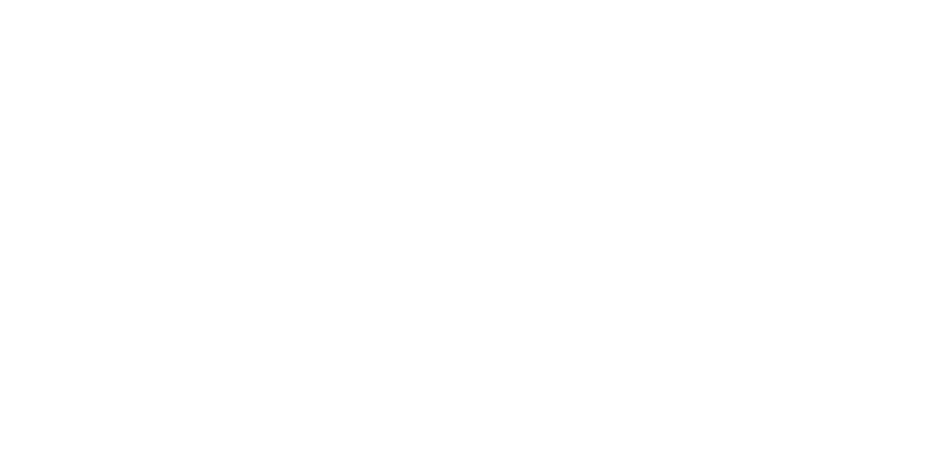

In [19]:
output_directory = "/media/jbruno/big_media/575_data/my_LFH_versions/binarized"
binarizer.save_binary_image(output_directory)
